In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tf.get_logger().setLevel('ERROR')                                  # This is to suppress the tensorflow warnings

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [5]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [29]:
print(x_train.shape)
print(y_train.shape)
print(y_train[17])

(60000, 28, 28)
(60000,)
8


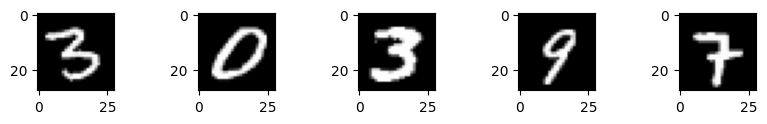

In [7]:
plt.figure(figsize=(10, 1))
for i in range(5):
    rand_indx = np.random.randint(1000)
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[rand_indx],cmap = 'gray')

In [8]:
x_train_og = x_train
x_test_og = x_test

x_train = x_train / 255
x_test = x_test / 255

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [10]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 11s 4ms/step - loss: 0.3060 - accuracy: 0.9131


In [12]:
predictions = model.predict(x_test[25:35])

1/1 [==============================] - 0s 216ms/step


In [13]:
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

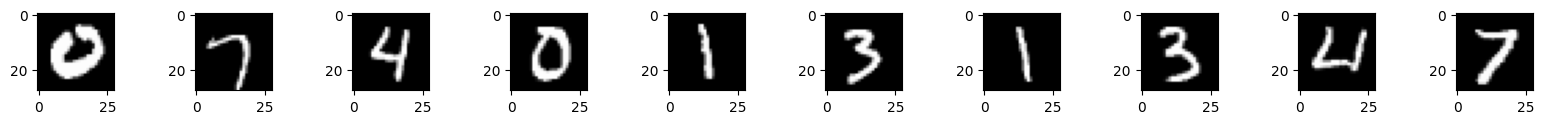

In [14]:
plt.figure(figsize=(20, 1))
for i,j in enumerate(range(25,35)):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[j],cmap = 'gray')

In [15]:
print(predicted_labels)

[0, 7, 4, 0, 1, 3, 1, 3, 4, 7]


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1800 - accuracy: 0.9471
Test loss: 0.1800122857093811
Test accuracy: 0.9470999836921692


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
tf_model_weights = [] 
tf_model_biases = []

for i,layer in enumerate(model.layers):

    if i == 0:                                   #Because its the flatten thing
        continue

    tf_model_weights.append(layer.get_weights()[0])
    tf_model_biases.append(layer.get_weights()[1])

